# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data Analysis

In [3]:
med_df = pd.read_csv('insurance.csv')

In [4]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
med_df.shape

(1338, 7)

In [6]:
med_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\91638\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


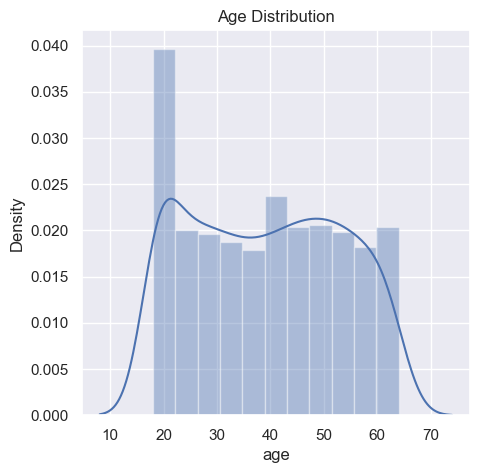

In [9]:
# Analysis of age function
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(med_df['age'])
plt.title('Age Distribution')
plt.show()

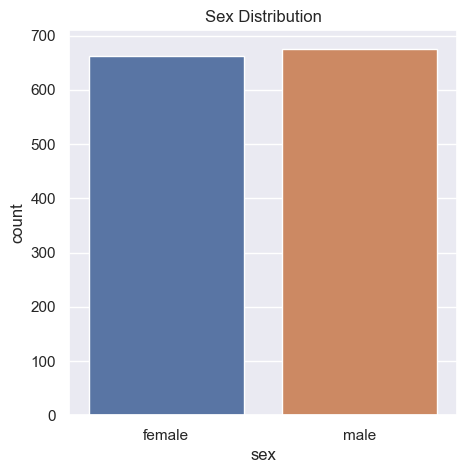

In [12]:
# Analysis for sex
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex', data = med_df)
plt.title('Sex Distribution')
plt.show()

C:\Users\91638\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


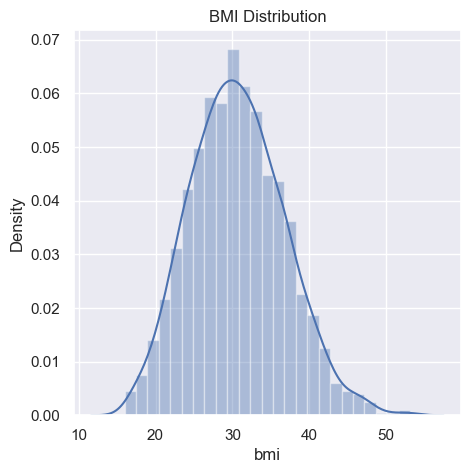

In [14]:
# Analyis for bmi
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(med_df['bmi'])
plt.title('BMI Distribution')
plt.show()

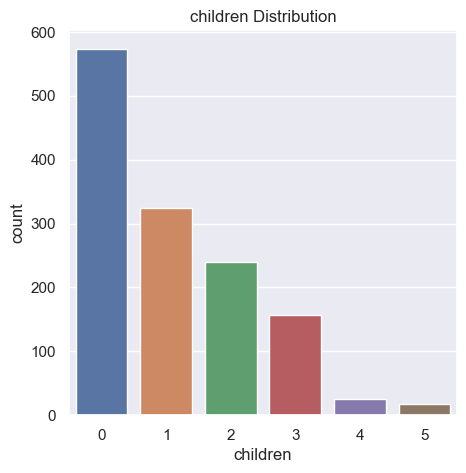

In [15]:
# Analysis for children
plt.figure(figsize=(5,5))
sns.countplot(x = 'children', data = med_df)
plt.title('children Distribution')
plt.show()

In [16]:
med_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
med_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\91638\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


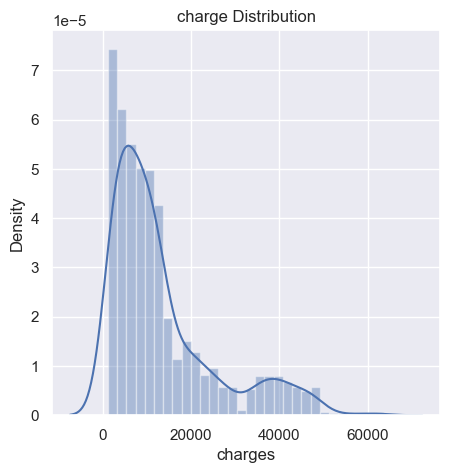

In [18]:
# Analysis of charge
plt.figure(figsize=(5,5))
sns.distplot(med_df['charges'])
plt.title('charge Distribution')
plt.show()

# Data PreProcessing

In [19]:
# Label Encoding
label_en = LabelEncoder()

In [20]:
med_df['sex']  = label_en.fit_transform(med_df.sex)

In [21]:
med_df['smoker']  = label_en.fit_transform(med_df.smoker)

In [22]:
med_df['region']  = label_en.fit_transform(med_df.region)

In [23]:
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Train Test Split

In [24]:
x = med_df.drop('charges', axis=1)

In [25]:
y = med_df['charges']

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

# Model Training

In [31]:
linear = LinearRegression()

In [34]:
linear.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [36]:
# Accuracy on the train data
x_train_pred = linear.predict(x_train)
# R-squared error
r2_score = metrics.r2_score(y_train, x_train_pred)
print(r2_score)

0.7519923667088932


In [37]:
# Accuracy on test data
x_test_pred = linear.predict(x_test)
# R-squared error
r2_score = metrics.r2_score(y_test, x_test_pred)
print(r2_score)

0.7445422986536503


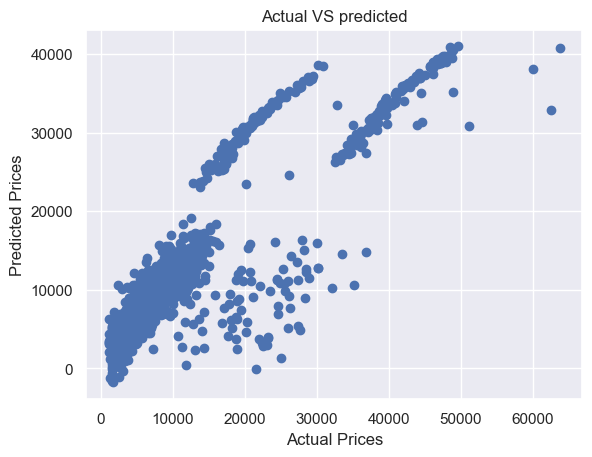

In [38]:
# Visualize the actual prices and predicted prices for training data
plt.scatter(y_train, x_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

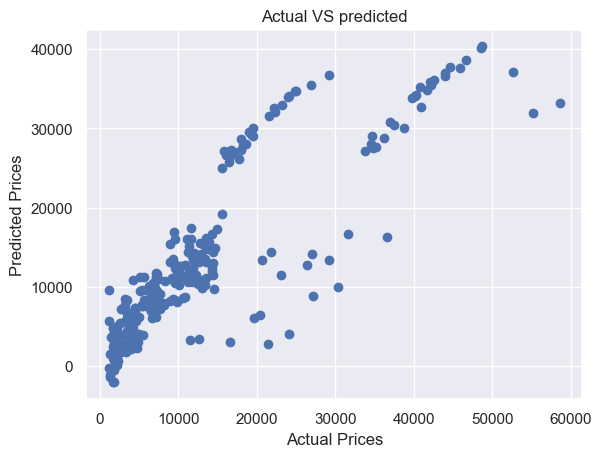

In [39]:
# Visualize the actual prices and predicted prices for testing data
plt.scatter(y_test, x_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

# Predictive System

In [41]:
input_data = [19,0,27.900,0,1,3]
# Changing the ip data to an numpy array
input_array = np.asarray(input_data)
# Reshape the numpy array
input_reshape = input_array.reshape(1,-1)
# Make prediction
prediction = linear.predict(input_reshape)
prediction

C:\Users\91638\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25191.82745682])

In [ ]:
# The model that predicted is approximately ryt!